In [14]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score

In [4]:
data = pd.read_csv('../../Finalized Data/final_with_race.csv')

In [5]:
data.drop(['File','days_jail_doc','Unnamed: 0', 'Unanimous'],axis=1,inplace=True)

In [6]:
y = data.pop('Y')

In [7]:
X = data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

### Build initial model for testing

In [7]:
model = LinearSVC(penalty='l1', dual=False)
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [8]:
forecast = model.predict(X_test)

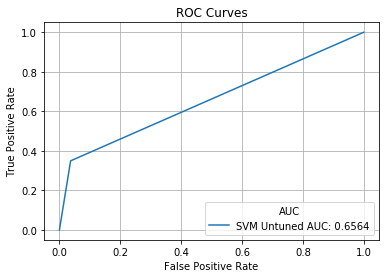

In [11]:
plot_roc(y_test, forecast,'SVM Untuned')
plt.show()

In [40]:
def plot_roc(actual,forecast,name):
    
    #ROC
    fpr, tpr, thresholds = metrics.roc_curve(actual, forecast)

    #AUC
    aucc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, label = name + ' AUC: '+str(round(aucc, 4)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.grid(True)
    plt.legend(loc = 'lower right', title='AUC')

In [ ]:
forecast = model.predict(X_test)

### Model Tuning

In [12]:
#Grid search
param_grid = [
    {'penalty' : ['l1'],
     'dual':[False],
     'C': [1,0.5,0.1,0.01,0.001]}  
]

In [13]:
grid_search = GridSearchCV(LinearSVC(), param_grid=param_grid, scoring= 'roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'penalty': ['l1'], 'dual': [False], 'C': [1, 0.5, 0.1, 0.01, 0.001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [14]:
grid_search.best_params_

{'C': 0.1, 'dual': False, 'penalty': 'l1'}

In [10]:
best_svm = LinearSVC(C=0.1,dual=False, penalty='l1')

In [11]:
best_svm.fit(X_train, y_train)

LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [34]:
scores = np.dot(X_test,best_svm.coef_.T)

In [37]:
min_x = min(scores)
max_x = max(scores)
range_x = max_x-min_x
forecast = list(map(lambda x: (x-min_x)/range_x, scores))

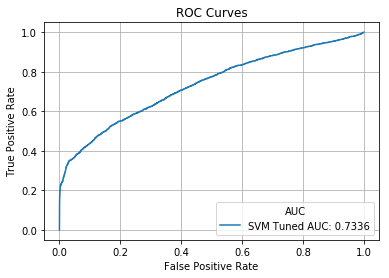

In [41]:
plot_roc(y_test, forecast,'SVM Tuned')
plt.show()

In [66]:
def show_most_informative_features(model, names, n=20):
    feature_names = names
    coefs = model.coef_.T
    coefs_with_fns = sorted(zip(coefs, feature_names),reverse=True)
    top = zip(coefs_with_fns[:n],coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1),(coef_2, fn_2) in top:
        
        print("%.4f\t%-40s\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

In [67]:
show_most_informative_features(best_svm, X_train.columns.values)

0.6317	judge_info_missing                      			-0.3713	unanimous      
0.2714	a_Friday                                			-0.3396	appellant      
0.1954	da_2009-contested                       			-0.2567	AppealD_2003   
0.1830	type_crime_nan                          			-0.2350	AppealD_2004   
0.1786	Facility_GROVELAND                      			-0.2308	da_2011-contested
0.1774	da_university_nan                       			-0.2307	County of Commitment_WESTCHESTER 
0.1617	da_2005                                 			-0.2108	AppealD_2005   
0.1508	da_2012-contested                       			-0.1972	AppealD_2006   
0.1465	da_black                                			-0.1825	da_2015-contested
0.1428	2001                                    			-0.1660	type_crime_rape
0.1278	da_female                               			-0.1504	Facility_WOODBOURNE 
0.1232	County of Commitment_BRONX              			-0.1468	defense__legal aid society
0.1195	1985                                    			-0.1465	da_2009        
